In [1]:
#!pip install spacy

In [2]:
#pip install typing-extensions --upgrade

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
import string


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
elon_musk=pd.read_csv('Elon_musk.csv',encoding='cp1252')
pd.set_option('display.max_columns',None)
elon_musk.head(30)

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


### Data Preprocessing

#### Special characters removal

In [5]:
elon_musk.Text=elon_musk.Text.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))
elon_musk.head(10)

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazin...
5,6,Happy New Year of the Ox httpstcoWFKMYuoj
6,7,Frodo was the underdogeAll thought he would fa...
7,8,OwenSparks flcnhvy anonyx Haha thanks
8,9,flcnhvy anonyx Indeed Tweets definitely do not...
9,10,The most entertaining outcome is the most likely


#### Lower casing

In [6]:
elon_musk.Text=elon_musk.Text.apply(lambda x: x.lower())
elon_musk

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazin...
...,...,...
1994,1995,flcnhvy true it sounds so surreal but the nega...
1995,1996,ppathole make sure to read ur terms amp condit...
1996,1997,teslagong ppathole samwise gamgee
1997,1998,ppathole altho dumb and dumber is ufuf


#### Tokenization

In [7]:
elon_musk.Text=elon_musk.Text.apply(lambda x: x.split())
elon_musk

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, ..."
...,...,...
1994,1995,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,1996,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,1997,"[teslagong, ppathole, samwise, gamgee]"
1997,1998,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


#### Stop words removal

In [8]:
elon_musk.Text=elon_musk.Text.apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])
elon_musk

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, amazi..."
...,...,...
1994,1995,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,1996,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,1997,"[teslagong, ppathole, samwise, gamgee]"
1997,1998,"[ppathole, altho, dumb, dumber, ufuf]"


#### Stemming

In [9]:
ps=PorterStemmer()

In [10]:
elon_musk.Text=elon_musk.Text.apply(lambda x:[ps.stem(word) for word in x])
elon_musk

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,3,"[joerogan, spotifi, great, interview]"
3,4,"[gtera, doge, underestim]"
4,5,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...,...
1994,1995,"[flcnhvi, true, sound, surreal, neg, propagand..."
1995,1996,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,1997,"[teslagong, ppathol, samwis, gamge]"
1997,1998,"[ppathol, altho, dumb, dumber, ufuf]"


### Joining

In [11]:
elon_musk.Text=elon_musk.Text.apply(lambda x: " ".join(x))
elon_musk

,Unnamed: 0,Text
0,1,kunalb im alien
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,3,joerogan spotifi great interview
3,4,gtera doge underestim
4,5,teslacn congratul tesla china amaz execut last...
...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda stil...
1995,1996,ppathol make sure read ur term amp condit clic...
1996,1997,teslagong ppathol samwis gamge
1997,1998,ppathol altho dumb dumber ufuf


### CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv=CountVectorizer()
X=cv.fit_transform(elon_musk.Text.values).toarray()
X=pd.DataFrame(X,columns=cv.get_feature_names_out())
X

aber  abl  abo  aboard  abort  absenc  absolut  absorb  absorpt  absurd  \
0        0    0    0       0      0       0        0       0        0       0   
1        0    0    0       0      0       0        0       0        0       0   
2        0    0    0       0      0       0        0       0        0       0   
3        0    0    0       0      0       0        0       0        0       0   
4        0    0    0       0      0       0        0       0        0       0   
...    ...  ...  ...     ...    ...     ...      ...     ...      ...     ...   
1994     0    0    0       0      0       0        0       0        0       0   
1995     0    0    0       0      0       0        0       0        0       0   
1996     0    0    0       0      0       0        0       0        0       0   
1997     0    0    0       0      0       0        0       0        0       0   
1998     0    0    0       0      0       0        0       0        0       0   

      absurdli  ac  academia  accel  acceler  accelera  accept  access  accid  \
0            0   0         0      0        0         0       0       0      0   
1            0   0         0      0        0         0       0       0      0   
2            0   0         0      0        0         0       0       0      0   
3            0   0         0      0        0         0       0       0      0   
4            0   0         0      0        0         0       0       0      0   
...        ...  ..       ...    ...      ...       ...     ...     ...    ...   
1994         0   0         0      0        0         0       0       0      0   
1995         0   0         0      0        0         0       1       0      0   
1996         0   0         0      0        0         0       0       0      0   
1997         0   0         0      0        0         0       0       0      0   
1998         0   0         0      0        0         0       0       0      0   

      accident  accommod  account  accur  accura  accuraci  ace  achi  achiev  \
0            0         0        0      0       0         0    0     0       0   
1            0         0        0      0       0         0    0     0       0   
2            0         0        0      0       0         0    0     0       0   
3            0         0        0      0       0         0    0     0       0   
4            0         0        0      0       0         0    0     0       0   
...        ...       ...      ...    ...     ...       ...  ...   ...     ...   
1994         0         0        0      0       0         0    0     0       0   
1995         0         0        0      0       0         0    0     0       0   
1996         0         0        0      0       0         0    0     0       0   
1997         0         0        0      0       0         0    0     0       0   
1998         0         0        0      0       0         0    0     0       0   

      acquisit  across  action  activ  actual  actuari  ad  adagio  adamblitz  \
0            0       0       0      0       0        0   0       0          0   
1            0       0       0      0       0        0   0       0          0   
2            0       0       0      0       0        0   0       0          0   
3            0       0       0      0       0        0   0       0          0   
4            0       0       0      0       0        0   0       0          0   
...        ...     ...     ...    ...     ...      ...  ..     ...        ...   
1994         0       0       0      0       0        0   0       0          0   
1995         0       0       0      0       0        0   0       0          0   
1996         0       0       0      0       0        0   0       0          0   
1997         0       0       0      0       0        0   0       0          0   
1998         0       0       0      0       0        0   0       0          0   

      adamhoov  adamkiotz  adamklotz  add  addit  address  adlanbogatyryov  \
0            0          0          0

In [13]:
X.shape

(1999, 4508)

In [14]:
#!pip install wordcloud
from wordcloud import WordCloud

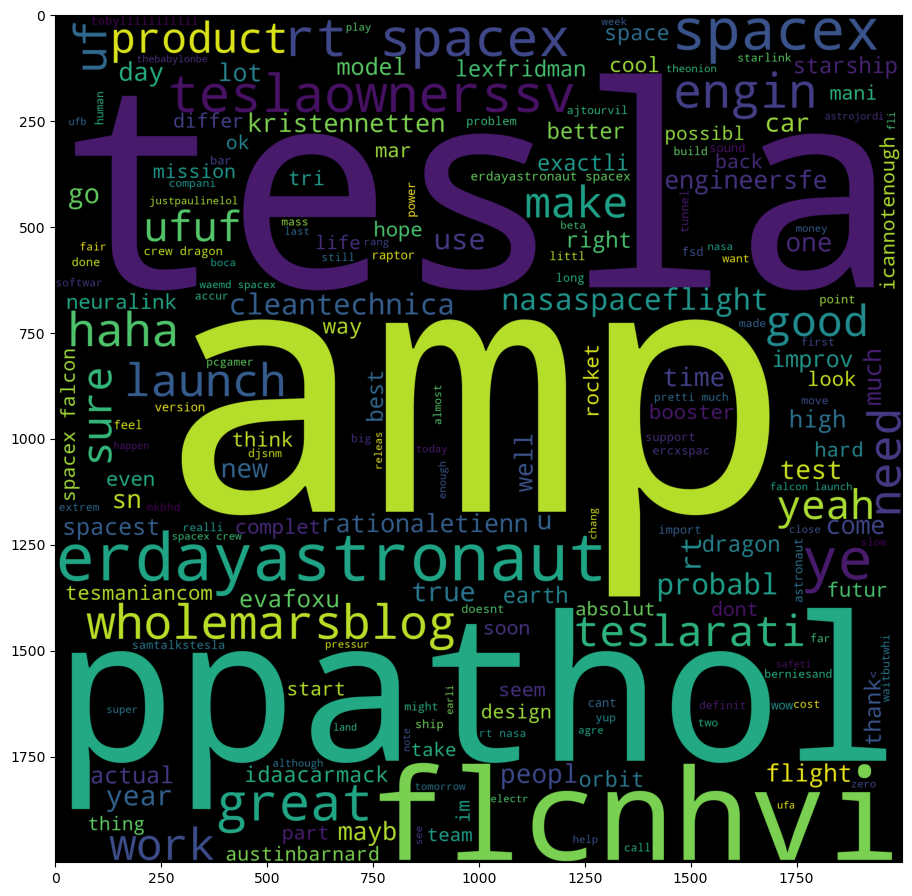

In [15]:
worldcloud_text=' '.join(elon_musk['Text'])
worldcloud=WordCloud(background_color='Black',width=2000,height=2000).generate(worldcloud_text)
worldcloud

plt.figure(figsize=(18,11))
plt.imshow(worldcloud)
plt.show()

In [16]:
#!pip install textblob

In [17]:
from textblob import TextBlob
elon_musk['polarity']=elon_musk['Text'].apply(lambda x: TextBlob(x).sentiment[0])
elon_musk

,Unnamed: 0,Text,polarity
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000
2,3,joerogan spotifi great interview,0.800000
3,4,gtera doge underestim,0.000000
4,5,teslacn congratul tesla china amaz execut last...,0.000000
...,...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda stil...,0.186667
1995,1996,ppathol make sure read ur term amp condit clic...,0.500000
1996,1997,teslagong ppathol samwis gamge,0.000000
1997,1998,ppathol altho dumb dumber ufuf,-0.375000


In [18]:
elon_musk.insert(column='emotion',value='',loc=3)
elon_musk

,Unnamed: 0,Text,polarity,emotion
0,1,kunalb im alien,-0.250000,
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,
2,3,joerogan spotifi great interview,0.800000,
3,4,gtera doge underestim,0.000000,
4,5,teslacn congratul tesla china amaz execut last...,0.000000,
...,...,...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda stil...,0.186667,
1995,1996,ppathol make sure read ur term amp condit clic...,0.500000,
1996,1997,teslagong ppathol samwis gamge,0.000000,
1997,1998,ppathol altho dumb dumber ufuf,-0.375000,


In [19]:
def senti(text):
    if text<0:
        return 'negative'
    elif text==0:
        return 'neutral'
    else:
        return 'positive'

elon_musk['emotion']=elon_musk['polarity'].apply(senti)

In [20]:
elon_musk

,Unnamed: 0,Text,polarity,emotion
0,1,kunalb im alien,-0.250000,negative
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,neutral
2,3,joerogan spotifi great interview,0.800000,positive
3,4,gtera doge underestim,0.000000,neutral
4,5,teslacn congratul tesla china amaz execut last...,0.000000,neutral
...,...,...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda stil...,0.186667,positive
1995,1996,ppathol make sure read ur term amp condit clic...,0.500000,positive
1996,1997,teslagong ppathol samwis gamge,0.000000,neutral
1997,1998,ppathol altho dumb dumber ufuf,-0.375000,negative


#### Emotions countplot

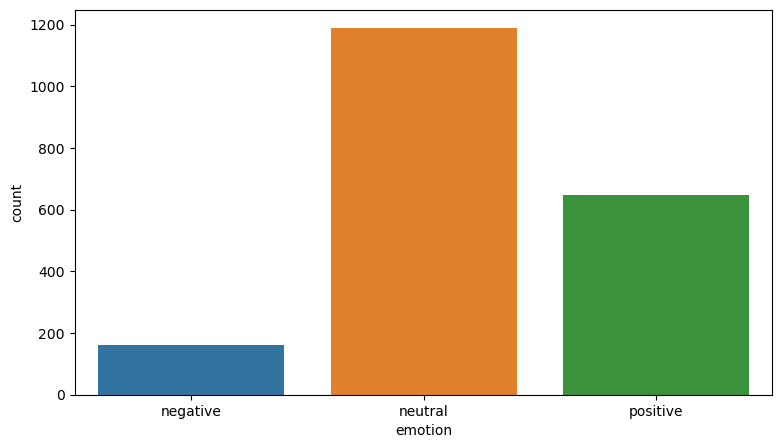

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(x=elon_musk['emotion'])
plt.show()

In [22]:
elon_musk.emotion.value_counts(normalize=True).mul(100)

neutral     59.479740
positive    32.466233
negative     8.054027
Name: emotion, dtype: float64

### Around 60% of tweet was neutral while 1/3rd of tweets are positive(32.4%) and left out minor group showed negative(8%) emotion